In [1]:
#check current directory
%pwd

u'/Users/trinakarmakar/anaconda2'

In [2]:
import os, sys
current_dir = os.getcwd()
lesson_home_dr = current_dir
data_home_dir = current_dir+'/data/fastai/redux/'

In [3]:
#allow relative imports to directories above lesson1

sys.path.insert(1, os.path.join(sys.path[0], '..'))

#import modules
from utils import *
from Vgg16 import Vgg16

%matplotlib notebook

Using TensorFlow backend.


# Tasks:
   ###  1. Create test nad validation sets
   ###  2. Rearrange images into resptective folders-train,valid,test
   ###  3. Finetune & Train model
   ###  4. Generate Prediction
   ###  5. Validate Predictions
   ###  6. Submit prediction to Kaggle

## 1. Create validation set samples

In [4]:
%cd $data_home_dir
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/Users/trinakarmakar/anaconda2/data/fastai/redux
mkdir: valid: File exists
mkdir: results: File exists


In [5]:
%cd $data_home_dir

/Users/trinakarmakar/anaconda2/data/fastai/redux


In [6]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000):
    os.rename(shuf[i], data_home_dir+'/valid/' + shuf[i])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
from shutil import copyfile

In [8]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(200):
    copyfile(shuf[i], data_home_dir+"/sample/train/" + shuf[i])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [9]:
%cd $data_home_dir/valid

/Users/trinakarmakar/anaconda2/data/fastai/redux/valid


In [10]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(50):
    copyfile(shuf[i], data_home_dir+'sample/valid/' + shuf[i])

IndexError: index 0 is out of bounds for axis 0 with size 0

# 2. Rearrange the images into their respective directory

In [12]:
#Divide cat/dog images into separate directories

%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

[Errno 2] No such file or directory: '$DATA_HOME_DIR/sample/train'
/Users/trinakarmakar/anaconda2/data/fastai/redux/valid
mkdir: cats: File exists
mkdir: dogs: File exists
mv: rename cat.*.jpg to cats/cat.*.jpg: No such file or directory
mv: rename dog.*.jpg to dogs/dog.*.jpg: No such file or directory
[Errno 2] No such file or directory: '$DATA_HOME_DIR/sample/valid'
/Users/trinakarmakar/anaconda2/data/fastai/redux/valid
mkdir: cats: File exists
mkdir: dogs: File exists
mv: rename cat.*.jpg to cats/cat.*.jpg: No such file or directory
mv: rename dog.*.jpg to dogs/dog.*.jpg: No such file or directory
[Errno 2] No such file or directory: '$DATA_HOME_DIR/valid'
/Users/trinakarmakar/anaconda2/data/fastai/redux/valid
mkdir: cats: File exists
mkdir: dogs: File exists
mv: rename cat.*.jpg to cats/cat.*.jpg: No such file or directory
mv: rename dog.*.jpg to dogs/dog.*.jpg: No such file or directory
[Errno 2] No such file or directory: '$DATA_HOME_DIR/train'
/Users/trinakarmakar/anaconda2/data

In [13]:
# create single unknown class for test case
%cd $data_home_dir/test
%mv *.jpg unknown/

/Users/trinakarmakar/anaconda2/data/fastai/redux/test
mv: rename *.jpg to unknown/*.jpg: No such file or directory


## 3. Finetune and Training

In [14]:
%cd $data_home_dir

#Set path to sample/ path if desired
path = data_home_dir  #'/sample/'
test_path = data_home_dir + '/test/' #We use all the test data
results_path= data_home_dir + 'results/'
train_path=path + 'train/'
valid_path=path + 'valid/'

/Users/trinakarmakar/anaconda2/data/fastai/redux


In [15]:
train_path

'/Users/trinakarmakar/anaconda2/data/fastai/redux/train/'

In [16]:
valid_path

'/Users/trinakarmakar/anaconda2/data/fastai/redux/valid/'

In [17]:
#import Vgg16 helper class
vgg = Vgg16()

In [18]:
#set constraints - you can experiment with them 
no_of_epochs = 4
batch_size = 64

In [19]:
batches = vgg.get_batches(train_path, batch_size = batch_size)
val_batches = vgg.get_batches(valid_path, batch_size = batch_size*2)
vgg.finetune(batches)

#another parameter that we can tune
vgg.model.optimizer.lr = 0.01

Found 22750 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
#for each epoch we test our model agains the validation dataset by using fit()
#method
for epoch in range(no_of_epochs):
    print("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' %epoch
    vgg.model_save_weights(results_path+latest_weights_filename)
print("Completed %s fir operations %s"  % no_of_epochs)

Running epoch: 0
Epoch 1/1
   64/22750 [..............................] - ETA: 53434s - loss: 1.6317 - acc: 0.5938

In [ ]:
#Lets make our model to make some prediction on some text images
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

In [ ]:
print(preds[:5])
filenames = batches.filenames
print(filename[:5])

In [ ]:
#verify column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [ ]:
#Save youur test results arrays so we can use them again later
save_array(result_path + 'test_preds.dat', preds)
save_array(result_path + 'filenames.dat', filenames)

In [ ]:
#calculate prediction on validation set so that we can see correct and incorrected
#predicted examples

vgg.model.load_weights(results_path+latest_weights_filename)

In [ ]:
val_batches, probs = vgg.test(valid_path, batch_size=batch_size)

In [ ]:
filenames = val_batches.filenames

In [ ]:
expected_labels  val_batches.classes

In [ ]:
#round our prediction to 0,1 to generate labels
our_predictions = probs[:, 0]
our_labels = np.round(1-our_predictions)

In [ ]:
from keras.preprocessing import imagehttp://localhost:8888/notebooks/fastai_part1_lesson2.ipynb#

#Helper function to plot images by index in the calidation set
#plots is a helper function in utils.py

def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles = titles)

#Number of images to view for each visualization task
n_view = 4

In [ ]:
#1. A few correct example at random
correct = np.where(our_labels==expected_labels)[0]
print("found %d correct labels" % len(correct))
idx = premutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

In [ ]:
#2. A few incorrect labesl at random
incorrect = np.where(our_labels != expected_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_prediction[idx])

In [ ]:
#3a. Images we mst confident cats are actually cats
correct_cats = np.where((our_labels ==0) & (our_labels == expected_labels))[0]
print("Found %d confident correct cats labels", % len(correct_labels))
most_correct_cats = np.argsort(our_prediction(correct_cats))[:n_view]
plots_idx(correct_cats[most_correct_cats], our_prediction[correct_cats])

In [ ]:
#3b. Images we mst confident dogs are actually cats
correct_dogs = np.where((our_labels ==1) & (our_labels == expected_labels))[0]
print("Found %d confident correct dogs labels", % len(correct_labels))
most_correct_dogs = np.argsort(our_prediction(correct_dogs))[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_prediction[correct_dogs])

In [ ]:
#4a. The images that we most confident cats are really dogs
incorrect_cats = np.where[(our_labels == 0) & (expected_labels != our_labels)]
print("Found %d incorrect cats:", % len(incorrect_cats))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_prediction[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats]

In [ ]:
#4a. The images that we most confident dogs are really catss
incorrect_cats = np.where[(our_labels == 1) & (expected_labels != our_labels)]
print("Found %d incorrect dogs:", % len(incorrect_dogs))
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_prediction[incorrect_dogs])[::-1][:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs]

In [ ]:
#5. The most uncertain labels (ie. those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

In [ ]:
#Use scikit learn to analyze classification results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

In [ ]:
plot_confusion_matrix(cm, val_batches.class_indices)

Kaggle wants image id and a probablilty of image being dog, it uses a logloss function to evaluate submission.

In [ ]:
#load our test prediction from file
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [ ]:
#grab the dog prediction column
isdog = preds[:,1]
print("Raw Predictions: " + str(isdog[:5]))
print("Mid predictions:", + str(isdog[(isdog < 0.6) & (isdog > 0.4)]))
print("Edge predictions:", + str(isdog[(isdog == 1) | (isdog == 0)]))

Logloss does not support 0 or 1 as probability value, kaggle help to adjust 0 and 1 by very very small value to avoid 
this problem. Also logloss awards prediction that are confident and correct but penalizes prediction that are confident but 
wrong.

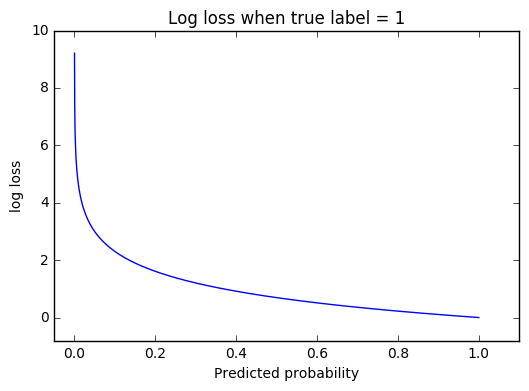

In [4]:
#visulaize log loss when true value = 1
#y-axis is log loss, x-axis is probability that label = 1
#As you see log loss increases rapidly when probability approaches 0 (incorrect prediction)
#But increaes slowly as it approaches correct prediction 1

# Visualize log loss for a large number 
from sklearn.metrics import log_loss 
x = [i * 0.0001 for i in range(1,10000)]
#y = [log_loss([1],[[i*.0001, 1-(i*.0001)]],eps=1e-15) for i in range(1,10000,1)]
y = [log_loss([0],[[i*.0001,1-(i*.0001)]],eps=1e-15, labels=[1,0]) for i in range(1,10000,1)]

plt.plot(x,y)
plt.axis([-0.05,1.1, -.8, 10])
plt.title("Log loss when true label = 1")
plt.xlabel("Predicted probability")
plt.ylabel("log loss")

plt.show()

In [ ]:
#we play a trick we tone down our edge prediction by changing 1 to 0.95 and 0 to 0.05
isdog = isdog.clip(min=0.05, max=0.95)

In [ ]:
#exract imageIds from the filenames in our test/unknown dir
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [ ]:
#We join two columns into an array of [imageId, isdog]
subm = np.stack([ids, isdog], axis=1)
subm[:5]

In [7]:
%cd $data_home_dir
submission_file_name = "submission.csv"
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/Users/trinakarmakar/anaconda2/data/fastai/redux


NameError: name 'subm' is not defined

In [ ]:
from IPython.display import FileLink
%cd $lesson_home_dir
FileLink('./data/redux/'.submission_file_name)